# Credit Card Fraud Detection

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df= pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Our observations are as

NaN values do not present in the data set. Because of the Non-Null Count and number of rows in the dataset match.

There are 29 Input Variables and 1 Output Variable (Class)

The data type of all the input variables is float64 whereas the data type of out variable (Class) is int64

In [6]:
df.shape

(284807, 31)

## Checking Null Values

In [7]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [8]:
#Summarization of Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The only non-transformed variables to work with are:<br>
    1.`Time`<br>
    2.`Amount`<br>
    3.`Class` (1: fraud, 0: not_fraud)

In [14]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [15]:
#Different amount of money is used in different type of Transaction 
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [17]:
#Fraudulent Transation Occur more often during certain time 
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


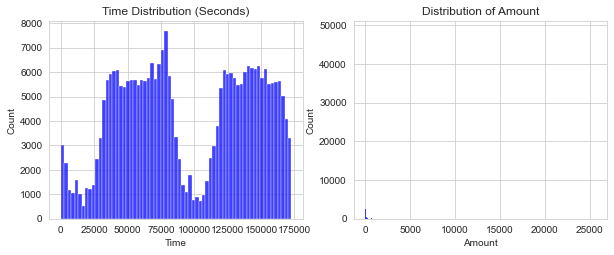

In [19]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.histplot(df['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.histplot(df['Amount'],color='blue');

In [20]:
def feature_dist_clas(df, col, hue):
    fig, axes = plt.subplots(1, 4, figsize = (25, 5))
    order = sorted(df[hue].unique())

    sns.histplot(x = col, hue = hue, data = df, ax = axes[0])
    sns.kdeplot(x = col, hue = hue, data = df, fill = True, ax = axes[1])
    sns.boxplot(y = col, hue = hue, data = df, x = [""] * len(df), ax = axes[2])
    sns.violinplot(y = col, hue = hue, data = df, x = [""] * len(df), ax = axes[3])
    
    fig.suptitle("For Feature:  " + col)
    axes[0].set_title("Histogram For Feature " + col)
    axes[1].set_title("KDE Plot For Feature " + col)   
    axes[2].set_title("Boxplot For Feature " + col)   
    axes[3].set_title("Violinplot For Feature " + col)   
    

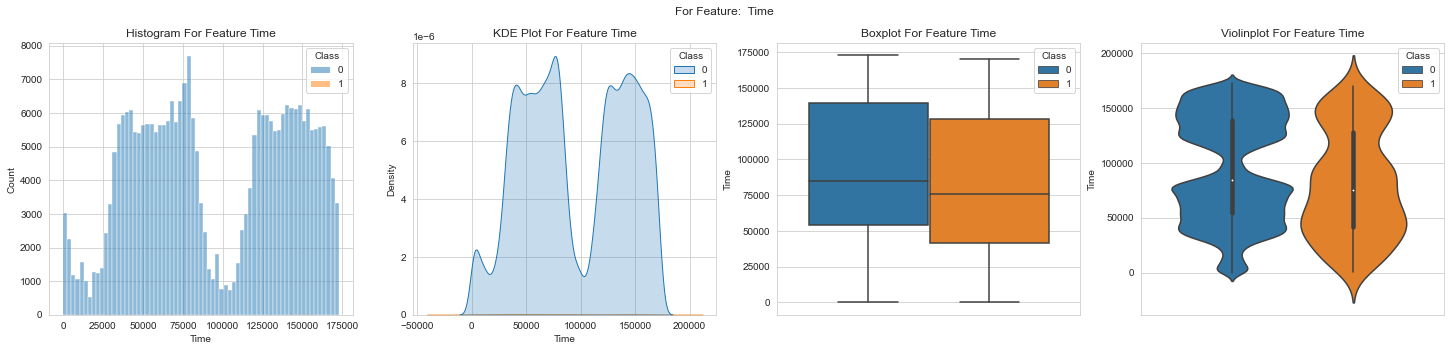

In [23]:
feature_dist_clas(df, 'Time', "Class")

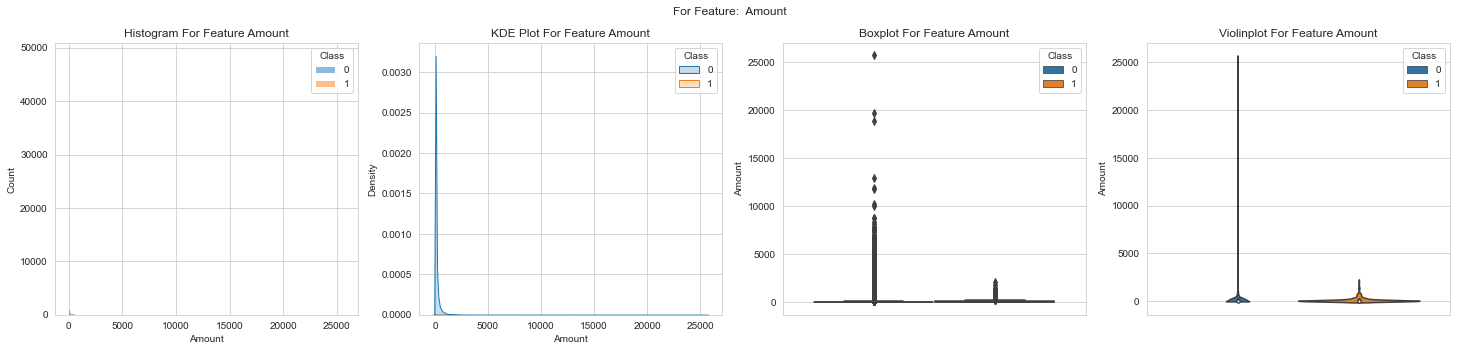

In [24]:
feature_dist_clas(df, 'Amount', 'Class')

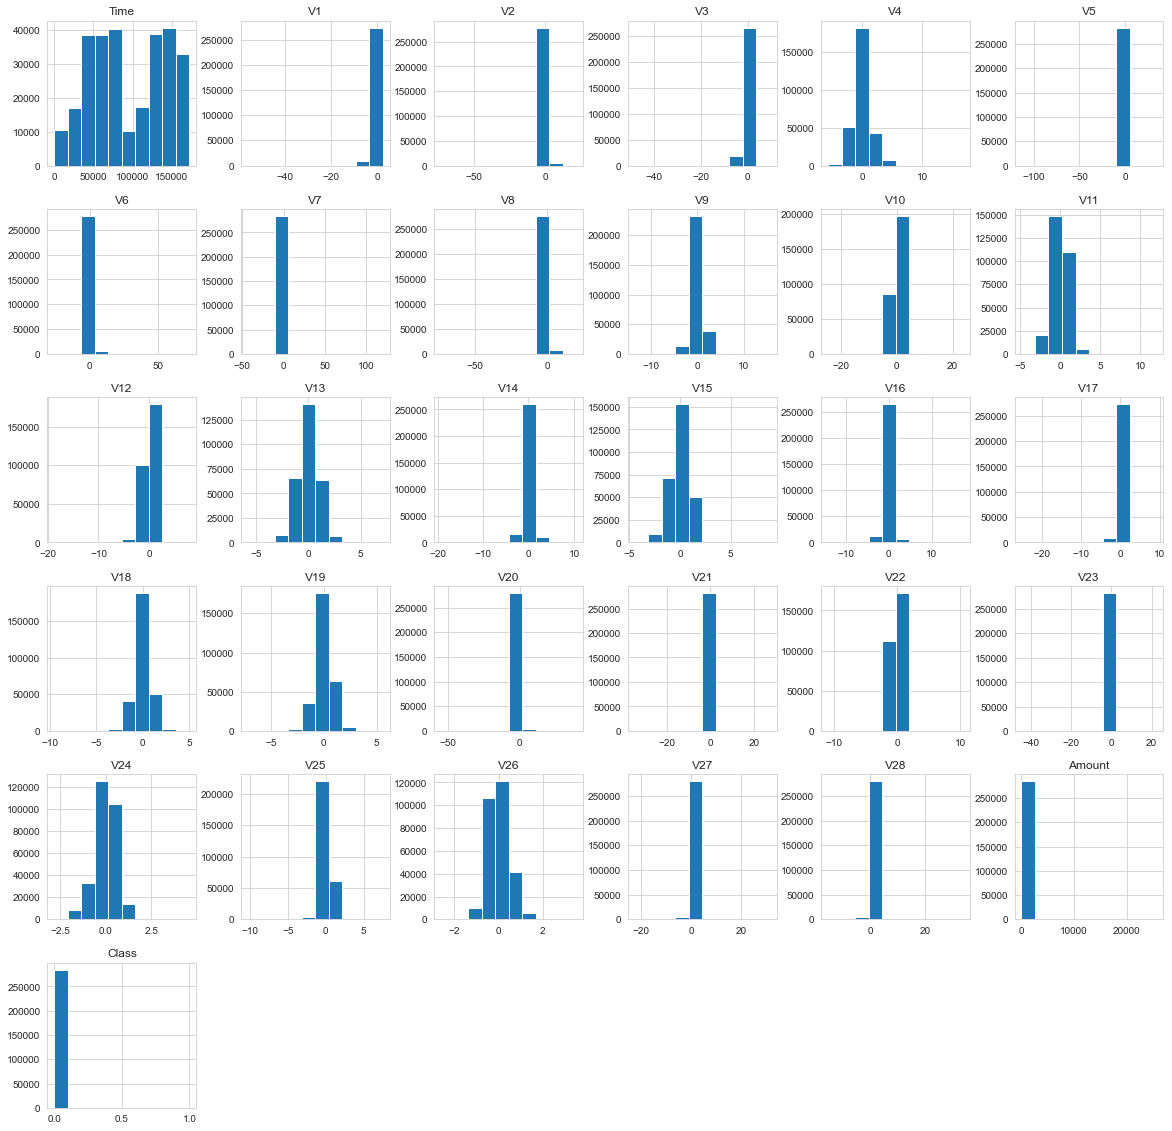

In [28]:
df.hist(figsize=(20, 20));

In [31]:
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
def feature_distribution(df, col):
    
    skewness = np.round(df[col].skew(), 3)
    kurtosis = np.round(df[col].kurtosis(), 3)

    fig, axes = plt.subplots(1, 3, figsize = (18, 6))

    sns.kdeplot(data = df, x = col, fill = True, ax = axes[0], color = "orangered")
    sns.boxplot(data = df, y = col, ax = axes[1], color = "orangered")
    stats.probplot(df[col], plot = axes[2])

    axes[0].set_title("Distribution \nSkewness: " + str(skewness) + "\nKurtosis: " + str(kurtosis))
    axes[1].set_title("Boxplot")
    axes[2].set_title("Probability Plot")
    fig.suptitle("For Feature:  " + col)

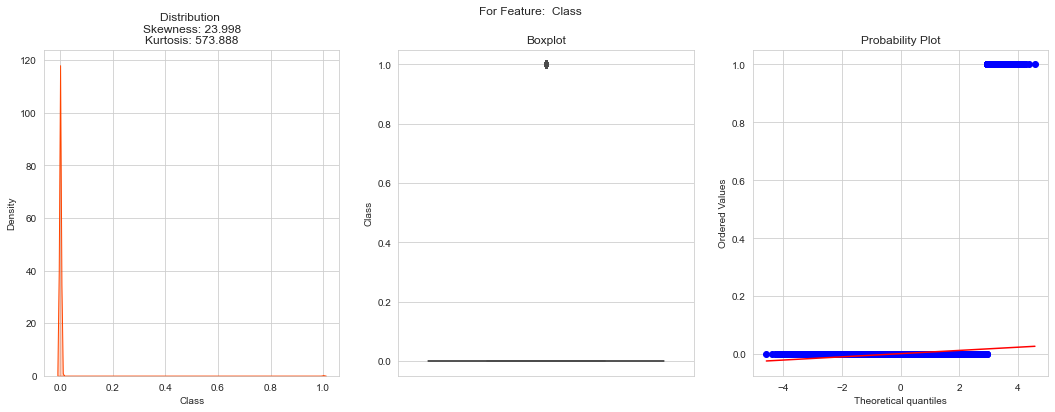

In [32]:
 feature_distribution(df, 'Class')

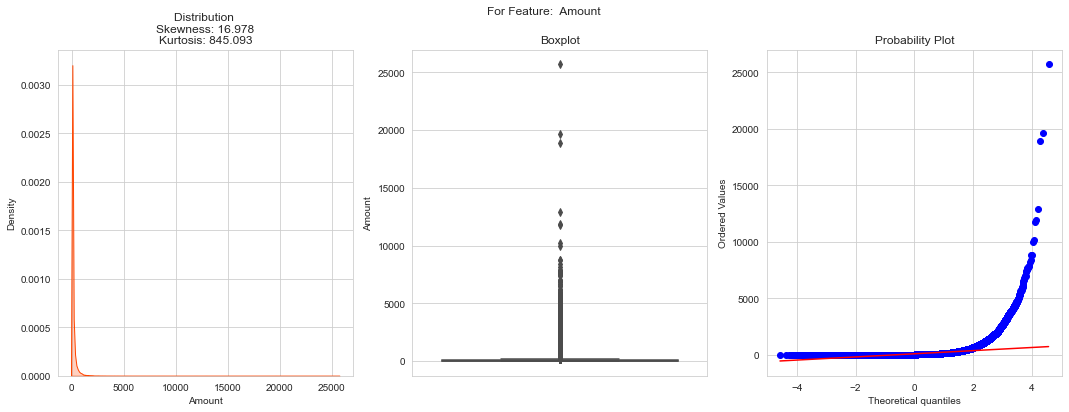

In [33]:
feature_distribution(df, 'Amount')

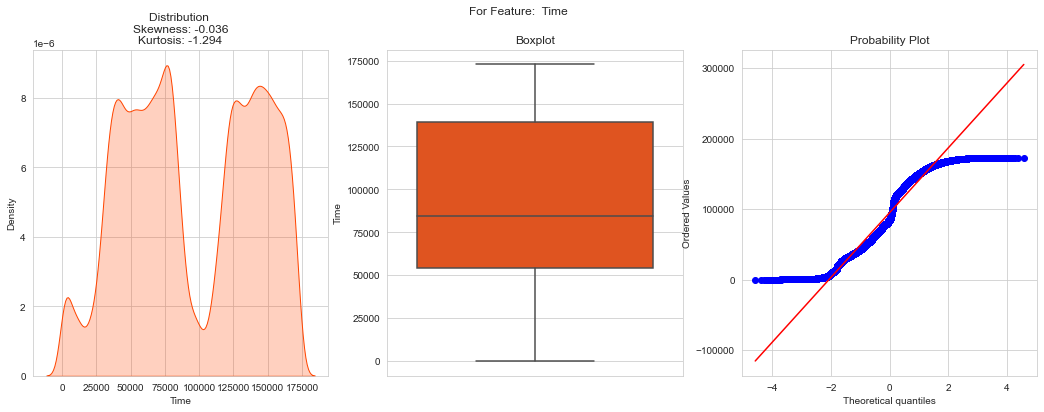

In [34]:
feature_distribution(df, 'Time')

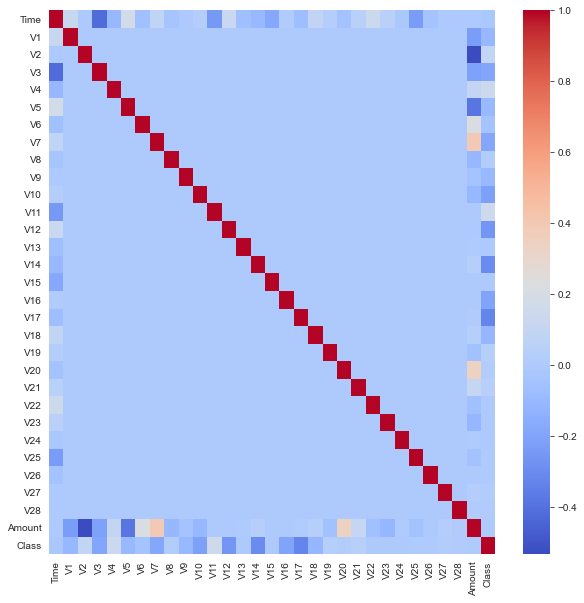

In [38]:
def heatmap(df):
    fig, ax = plt.subplots(figsize = (10, 10))
    sns.heatmap(df.corr(), cmap = "coolwarm")
    
heatmap(df)

Highest correlations come from:
- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V4 (0.4)

While these correlations are high, I don't expect it to run the risk of multicollinearity.

The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

## Data Pre-processing

`Time` and `Amount` should be scaled as the other columns.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = df.drop('Class', axis=1)
y = df.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v,test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print("Fraudulant transaction weight is {0}".format(w_n))
print("Non-Fraudulant transaction weight is {0}".format(w_p))

Fraudulant transaction weight is 0.0017994745785028623
Non-Fraudulant transaction weight is 0.9982005254214972


In [43]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}\n")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}\n")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________

VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________

TESTING: X_test: (85443, 30), y_test: (85443,)


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# Data Modellig

## Artificial Neural Network

In [47]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [48]:
METRICS = [
    keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300
78/78 [==============================] - 20s 186ms/step - loss: 0.4780 - accuracy: 6.1445e-04 - fn: 61.0000 - fp: 27913.0000 - tn: 131291.0000 - tp: 226.0000 - precision: 0.0080 - recall: 0.7875 - val_loss: 0.1777 - val_accuracy: 5.7683e-04 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 2/300
78/78 [==============================] - 9s 115ms/step - loss: 0.1041 - accuracy: 7.7120e-04 - fn: 89.0000 - fp: 587.0000 - tn: 158617.0000 - tp: 198.0000 - precision: 0.2522 - recall: 0.6899 - val_loss: 0.0416 - val_accuracy: 0.0011 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 3/300
78/78 [==============================] - 9s 114ms/step - loss: 0.0361 - accuracy: 7.7747e-04 - fn: 91.0000 - fp: 152.0000 - tn: 159052.0000 - tp: 196.0000 - precision: 0.5632 - recall: 0.6829 - val_loss: 0.0212 - val_accuracy: 7.5239e-04 - val_fn: 1

78/78 [==============================] - 9s 115ms/step - loss: 0.0030 - accuracy: 0.0017 - fn: 70.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 217.0000 - precision: 0.9156 - recall: 0.7561 - val_loss: 0.0043 - val_accuracy: 0.0013 - val_fn: 17.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 52.0000 - val_precision: 0.9123 - val_recall: 0.7536
Epoch 24/300
78/78 [==============================] - 9s 114ms/step - loss: 0.0031 - accuracy: 0.0015 - fn: 73.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 214.0000 - precision: 0.9185 - recall: 0.7456 - val_loss: 0.0040 - val_accuracy: 0.0013 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
Epoch 25/300
78/78 [==============================] - 9s 114ms/step - loss: 0.0027 - accuracy: 0.0014 - fn: 75.0000 - fp: 24.0000 - tn: 159180.0000 - tp: 212.0000 - precision: 0.8983 - recall: 0.7387 - val_loss: 0.0041 - val_accuracy: 0.0011 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 3979

Epoch 46/300
78/78 [==============================] - 9s 114ms/step - loss: 0.0018 - accuracy: 0.0022 - fn: 53.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 234.0000 - precision: 0.9213 - recall: 0.8153 - val_loss: 0.0042 - val_accuracy: 0.0019 - val_fn: 17.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 52.0000 - val_precision: 0.8814 - val_recall: 0.7536
Epoch 47/300
78/78 [==============================] - 9s 115ms/step - loss: 0.0018 - accuracy: 0.0020 - fn: 53.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 234.0000 - precision: 0.9286 - recall: 0.8153 - val_loss: 0.0045 - val_accuracy: 0.0021 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
Epoch 48/300
78/78 [==============================] - 9s 114ms/step - loss: 0.0019 - accuracy: 0.0019 - fn: 53.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 234.0000 - precision: 0.9398 - recall: 0.8153 - val_loss: 0.0044 - val_accuracy: 0.0019 - val_fn: 15.0000 - val_fp: 9.0000 -

Epoch 69/300
78/78 [==============================] - 9s 114ms/step - loss: 0.0016 - accuracy: 0.0019 - fn: 49.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 238.0000 - precision: 0.9189 - recall: 0.8293 - val_loss: 0.0048 - val_accuracy: 0.0017 - val_fn: 17.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 52.0000 - val_precision: 0.8525 - val_recall: 0.7536
Epoch 70/300
78/78 [==============================] - 9s 115ms/step - loss: 0.0012 - accuracy: 0.0021 - fn: 36.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 251.0000 - precision: 0.9617 - recall: 0.8746 - val_loss: 0.0053 - val_accuracy: 0.0026 - val_fn: 13.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 56.0000 - val_precision: 0.8116 - val_recall: 0.8116
Epoch 71/300
78/78 [==============================] - 9s 114ms/step - loss: 0.0012 - accuracy: 0.0024 - fn: 33.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 254.0000 - precision: 0.9478 - recall: 0.8850 - val_loss: 0.0050 - val_accuracy: 0.0021 - val_fn: 13.0000 - val_fp: 11.0000

Epoch 92/300
78/78 [==============================] - 9s 115ms/step - loss: 9.0119e-04 - accuracy: 0.0034 - fn: 26.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 261.0000 - precision: 0.9703 - recall: 0.9094 - val_loss: 0.0059 - val_accuracy: 0.0035 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 93/300
78/78 [==============================] - 9s 114ms/step - loss: 7.8269e-04 - accuracy: 0.0036 - fn: 25.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 262.0000 - precision: 0.9704 - recall: 0.9129 - val_loss: 0.0057 - val_accuracy: 0.0031 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 94/300
78/78 [==============================] - 9s 115ms/step - loss: 0.0010 - accuracy: 0.0037 - fn: 33.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 254.0000 - precision: 0.9442 - recall: 0.8850 - val_loss: 0.0056 - val_accuracy: 0.0030 - val_fn: 14.0000 - val_fp: 8.

78/78 [==============================] - 9s 115ms/step - loss: 7.7784e-04 - accuracy: 0.0028 - fn: 28.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 259.0000 - precision: 0.9453 - recall: 0.9024 - val_loss: 0.0056 - val_accuracy: 0.0024 - val_fn: 12.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 57.0000 - val_precision: 0.8636 - val_recall: 0.8261
Epoch 115/300
78/78 [==============================] - 9s 115ms/step - loss: 7.5172e-04 - accuracy: 0.0027 - fn: 29.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 258.0000 - precision: 0.9773 - recall: 0.8990 - val_loss: 0.0060 - val_accuracy: 0.0023 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 116/300
78/78 [==============================] - 9s 115ms/step - loss: 6.9768e-04 - accuracy: 0.0029 - fn: 24.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 263.0000 - precision: 0.9705 - recall: 0.9164 - val_loss: 0.0065 - val_accuracy: 0.0027 - val_fn: 13.0000 - val_fp: 11.0000 -

78/78 [==============================] - 9s 115ms/step - loss: 7.3569e-04 - accuracy: 0.0038 - fn: 23.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 264.0000 - precision: 0.9496 - recall: 0.9199 - val_loss: 0.0060 - val_accuracy: 0.0032 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 137/300
78/78 [==============================] - 9s 114ms/step - loss: 5.4960e-04 - accuracy: 0.0039 - fn: 19.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 268.0000 - precision: 0.9710 - recall: 0.9338 - val_loss: 0.0056 - val_accuracy: 0.0032 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 138/300
78/78 [==============================] - 9s 115ms/step - loss: 4.2834e-04 - accuracy: 0.0036 - fn: 13.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 274.0000 - precision: 0.9821 - recall: 0.9547 - val_loss: 0.0058 - val_accuracy: 0.0034 - val_fn: 12.0000 - val_fp: 8.0000 -

78/78 [==============================] - 9s 114ms/step - loss: 5.3435e-04 - accuracy: 0.0029 - fn: 21.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 266.0000 - precision: 0.9603 - recall: 0.9268 - val_loss: 0.0060 - val_accuracy: 0.0026 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
Epoch 159/300
78/78 [==============================] - 9s 114ms/step - loss: 4.1028e-04 - accuracy: 0.0035 - fn: 16.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 271.0000 - precision: 0.9644 - recall: 0.9443 - val_loss: 0.0064 - val_accuracy: 0.0033 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 160/300
78/78 [==============================] - 9s 115ms/step - loss: 3.4205e-04 - accuracy: 0.0037 - fn: 16.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 271.0000 - precision: 0.9679 - recall: 0.9443 - val_loss: 0.0063 - val_accuracy: 0.0030 - val_fn: 13.0000 - val_fp: 9.0000 -

78/78 [==============================] - 9s 113ms/step - loss: 5.0062e-04 - accuracy: 0.0033 - fn: 10.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 277.0000 - precision: 0.9652 - recall: 0.9652 - val_loss: 0.0066 - val_accuracy: 0.0028 - val_fn: 15.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 54.0000 - val_precision: 0.8308 - val_recall: 0.7826
Epoch 181/300
78/78 [==============================] - 9s 114ms/step - loss: 3.9868e-04 - accuracy: 0.0033 - fn: 13.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 274.0000 - precision: 0.9751 - recall: 0.9547 - val_loss: 0.0064 - val_accuracy: 0.0025 - val_fn: 15.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 54.0000 - val_precision: 0.8438 - val_recall: 0.7826
Epoch 182/300
78/78 [==============================] - 9s 115ms/step - loss: 3.6240e-04 - accuracy: 0.0032 - fn: 9.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 278.0000 - precision: 0.9720 - recall: 0.9686 - val_loss: 0.0067 - val_accuracy: 0.0028 - val_fn: 15.0000 - val_fp: 8.0000 -

78/78 [==============================] - 9s 113ms/step - loss: 3.6585e-04 - accuracy: 0.0055 - fn: 10.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 277.0000 - precision: 0.9685 - recall: 0.9652 - val_loss: 0.0074 - val_accuracy: 0.0044 - val_fn: 14.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 55.0000 - val_precision: 0.8333 - val_recall: 0.7971
Epoch 203/300
78/78 [==============================] - 9s 115ms/step - loss: 5.5129e-04 - accuracy: 0.0052 - fn: 11.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 276.0000 - precision: 0.9684 - recall: 0.9617 - val_loss: 0.0069 - val_accuracy: 0.0041 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 204/300
78/78 [==============================] - 9s 115ms/step - loss: 3.1467e-04 - accuracy: 0.0048 - fn: 9.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 278.0000 - precision: 0.9754 - recall: 0.9686 - val_loss: 0.0072 - val_accuracy: 0.0040 - val_fn: 14.0000 - val_fp: 8.0000 - v

78/78 [==============================] - 9s 115ms/step - loss: 4.1259e-04 - accuracy: 0.0045 - fn: 11.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 276.0000 - precision: 0.9787 - recall: 0.9617 - val_loss: 0.0070 - val_accuracy: 0.0037 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
Epoch 225/300
78/78 [==============================] - 9s 114ms/step - loss: 3.4663e-04 - accuracy: 0.0040 - fn: 9.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 278.0000 - precision: 0.9653 - recall: 0.9686 - val_loss: 0.0070 - val_accuracy: 0.0035 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 226/300
78/78 [==============================] - 9s 115ms/step - loss: 3.0607e-04 - accuracy: 0.0039 - fn: 11.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 276.0000 - precision: 0.9787 - recall: 0.9617 - val_loss: 0.0072 - val_accuracy: 0.0036 - val_fn: 14.0000 - val_fp: 8.0000 - v

78/78 [==============================] - 3s 44ms/step - loss: 3.0354e-04 - accuracy: 0.0049 - fn: 13.0000 - fp: 3.0000 - tn: 159201.0000 - tp: 274.0000 - precision: 0.9892 - recall: 0.9547 - val_loss: 0.0074 - val_accuracy: 0.0037 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 247/300
78/78 [==============================] - 3s 44ms/step - loss: 3.5139e-04 - accuracy: 0.0046 - fn: 9.0000 - fp: 4.0000 - tn: 159200.0000 - tp: 278.0000 - precision: 0.9858 - recall: 0.9686 - val_loss: 0.0075 - val_accuracy: 0.0042 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 248/300
78/78 [==============================] - 4s 45ms/step - loss: 2.5990e-04 - accuracy: 0.0044 - fn: 7.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 280.0000 - precision: 0.9825 - recall: 0.9756 - val_loss: 0.0073 - val_accuracy: 0.0036 - val_fn: 14.0000 - val_fp: 7.0000 - val_t

Epoch 269/300
78/78 [==============================] - 3s 45ms/step - loss: 1.6817e-04 - accuracy: 0.0047 - fn: 5.0000 - fp: 0.0000e+00 - tn: 159204.0000 - tp: 282.0000 - precision: 1.0000 - recall: 0.9826 - val_loss: 0.0077 - val_accuracy: 0.0041 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 270/300
78/78 [==============================] - 4s 45ms/step - loss: 1.8282e-04 - accuracy: 0.0047 - fn: 6.0000 - fp: 4.0000 - tn: 159200.0000 - tp: 281.0000 - precision: 0.9860 - recall: 0.9791 - val_loss: 0.0078 - val_accuracy: 0.0041 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 271/300
78/78 [==============================] - 3s 45ms/step - loss: 1.3779e-04 - accuracy: 0.0046 - fn: 3.0000 - fp: 4.0000 - tn: 159200.0000 - tp: 284.0000 - precision: 0.9861 - recall: 0.9895 - val_loss: 0.0078 - val_accuracy: 0.0041 - val_fn: 14.0000 - val_fp

78/78 [==============================] - 3s 44ms/step - loss: 2.5887e-04 - accuracy: 0.0043 - fn: 6.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 281.0000 - precision: 0.9757 - recall: 0.9791 - val_loss: 0.0078 - val_accuracy: 0.0037 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
Epoch 292/300
78/78 [==============================] - 4s 45ms/step - loss: 1.4290e-04 - accuracy: 0.0045 - fn: 8.0000 - fp: 4.0000 - tn: 159200.0000 - tp: 279.0000 - precision: 0.9859 - recall: 0.9721 - val_loss: 0.0077 - val_accuracy: 0.0038 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 293/300
78/78 [==============================] - 4s 45ms/step - loss: 2.9490e-04 - accuracy: 0.0043 - fn: 10.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 277.0000 - precision: 0.9823 - recall: 0.9652 - val_loss: 0.0074 - val_accuracy: 0.0032 - val_fn: 14.0000 - val_fp: 5.0000 - val_tn

In [50]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 6s 2ms/step - loss: 0.0051 - accuracy: 0.0042 - fn: 28.0000 - fp: 17.0000 - tn: 85290.0000 - tp: 108.0000 - precision: 0.8640 - recall: 0.7941
[0.005069978069514036, 0.0042250389233231544, 28.0, 17.0, 85290.0, 108.0, 0.8640000224113464, 0.7941176295280457]


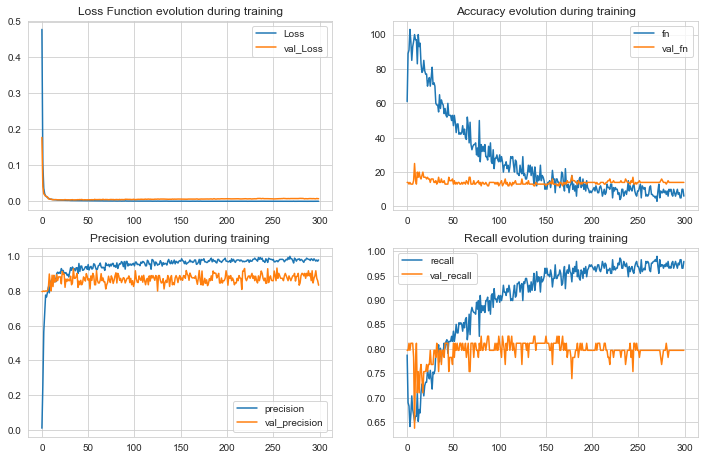

In [51]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [52]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999975    0.992982  0.999962       0.996479       0.999962
recall          0.999987    0.986063  0.999962       0.993025       0.999962
f1-score        0.999981    0.989510  0.999962       0.994746       0.999962
support    159204.000000  287.000000  0.999962  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159202      2]
 [     4    283]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999672    0.864000  0.999473      0.931836      0.999456
recall         0.999801    0.794118  0.999473      0.896959      0.999473
f1-score       0.999736    0.827586  0.999473      0.913661      0.999462

# XGBoost

In [53]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

c:\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.948718  0.999637      0.974212      0.999626
recall         0.999930    0.816176  0.999637      0.908053      0.999637
f1-score       0.999818    0.877470  0.999637      0.938644      0.999624
support    85307.000000  136.000000  0.999637  85443.000000  85443.000000


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.902439  0.999567      0.951073      0.999552
recall         0.999859    0.816176  0.999567      0.908018      0.999567
f1-score       0.999783    0.857143  0.999567      0.928463      0.999556
support    85307.000000  136.000000  0.999567  85443.000000  85443.000000


# CatBoost

In [56]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.089847
0:	learn: 0.3914719	total: 221ms	remaining: 3m 40s
1:	learn: 0.2368808	total: 279ms	remaining: 2m 19s
2:	learn: 0.1342688	total: 321ms	remaining: 1m 46s
3:	learn: 0.0789423	total: 348ms	remaining: 1m 26s
4:	learn: 0.0483660	total: 376ms	remaining: 1m 14s
5:	learn: 0.0315848	total: 403ms	remaining: 1m 6s
6:	learn: 0.0214003	total: 436ms	remaining: 1m 1s
7:	learn: 0.0153879	total: 463ms	remaining: 57.4s
8:	learn: 0.0115343	total: 489ms	remaining: 53.8s
9:	learn: 0.0090286	total: 514ms	remaining: 50.9s
10:	learn: 0.0071671	total: 540ms	remaining: 48.6s
11:	learn: 0.0060738	total: 567ms	remaining: 46.7s
12:	learn: 0.0052537	total: 593ms	remaining: 45s
13:	learn: 0.0046613	total: 623ms	remaining: 43.9s
14:	learn: 0.0042291	total: 650ms	remaining: 42.7s
15:	learn: 0.0038835	total: 677ms	remaining: 41.6s
16:	learn: 0.0036161	total: 702ms	remaining: 40.6s
17:	learn: 0.0034196	total: 728ms	remaining: 39.7s
18:	learn: 0.0032552	total: 754ms	remaining: 38.9s
19:	lear

162:	learn: 0.0012260	total: 4.91s	remaining: 25.2s
163:	learn: 0.0012214	total: 4.94s	remaining: 25.2s
164:	learn: 0.0012150	total: 4.97s	remaining: 25.2s
165:	learn: 0.0012097	total: 5s	remaining: 25.1s
166:	learn: 0.0012016	total: 5.03s	remaining: 25.1s
167:	learn: 0.0011946	total: 5.05s	remaining: 25s
168:	learn: 0.0011920	total: 5.09s	remaining: 25s
169:	learn: 0.0011905	total: 5.12s	remaining: 25s
170:	learn: 0.0011860	total: 5.14s	remaining: 24.9s
171:	learn: 0.0011820	total: 5.17s	remaining: 24.9s
172:	learn: 0.0011790	total: 5.2s	remaining: 24.8s
173:	learn: 0.0011781	total: 5.22s	remaining: 24.8s
174:	learn: 0.0011731	total: 5.25s	remaining: 24.8s
175:	learn: 0.0011620	total: 5.28s	remaining: 24.7s
176:	learn: 0.0011599	total: 5.31s	remaining: 24.7s
177:	learn: 0.0011578	total: 5.33s	remaining: 24.6s
178:	learn: 0.0011551	total: 5.36s	remaining: 24.6s
179:	learn: 0.0011522	total: 5.39s	remaining: 24.6s
180:	learn: 0.0011508	total: 5.42s	remaining: 24.5s
181:	learn: 0.0011487	

321:	learn: 0.0007811	total: 9.45s	remaining: 19.9s
322:	learn: 0.0007793	total: 9.48s	remaining: 19.9s
323:	learn: 0.0007788	total: 9.5s	remaining: 19.8s
324:	learn: 0.0007698	total: 9.53s	remaining: 19.8s
325:	learn: 0.0007684	total: 9.55s	remaining: 19.8s
326:	learn: 0.0007661	total: 9.58s	remaining: 19.7s
327:	learn: 0.0007643	total: 9.61s	remaining: 19.7s
328:	learn: 0.0007621	total: 9.63s	remaining: 19.7s
329:	learn: 0.0007555	total: 9.66s	remaining: 19.6s
330:	learn: 0.0007526	total: 9.69s	remaining: 19.6s
331:	learn: 0.0007518	total: 9.72s	remaining: 19.6s
332:	learn: 0.0007509	total: 9.75s	remaining: 19.5s
333:	learn: 0.0007434	total: 9.77s	remaining: 19.5s
334:	learn: 0.0007428	total: 9.8s	remaining: 19.5s
335:	learn: 0.0007419	total: 9.83s	remaining: 19.4s
336:	learn: 0.0007405	total: 9.86s	remaining: 19.4s
337:	learn: 0.0007389	total: 9.89s	remaining: 19.4s
338:	learn: 0.0007380	total: 9.92s	remaining: 19.3s
339:	learn: 0.0007342	total: 9.95s	remaining: 19.3s
340:	learn: 0.

483:	learn: 0.0004374	total: 13.8s	remaining: 14.7s
484:	learn: 0.0004366	total: 13.8s	remaining: 14.7s
485:	learn: 0.0004317	total: 13.9s	remaining: 14.7s
486:	learn: 0.0004299	total: 13.9s	remaining: 14.6s
487:	learn: 0.0004296	total: 13.9s	remaining: 14.6s
488:	learn: 0.0004272	total: 13.9s	remaining: 14.6s
489:	learn: 0.0004268	total: 14s	remaining: 14.5s
490:	learn: 0.0004248	total: 14s	remaining: 14.5s
491:	learn: 0.0004243	total: 14s	remaining: 14.5s
492:	learn: 0.0004227	total: 14.1s	remaining: 14.5s
493:	learn: 0.0004220	total: 14.1s	remaining: 14.4s
494:	learn: 0.0004217	total: 14.1s	remaining: 14.4s
495:	learn: 0.0004211	total: 14.1s	remaining: 14.4s
496:	learn: 0.0004187	total: 14.2s	remaining: 14.3s
497:	learn: 0.0004157	total: 14.2s	remaining: 14.3s
498:	learn: 0.0004140	total: 14.2s	remaining: 14.3s
499:	learn: 0.0004128	total: 14.2s	remaining: 14.2s
500:	learn: 0.0004098	total: 14.3s	remaining: 14.2s
501:	learn: 0.0004083	total: 14.3s	remaining: 14.2s
502:	learn: 0.0004

646:	learn: 0.0002719	total: 18.4s	remaining: 10.1s
647:	learn: 0.0002715	total: 18.5s	remaining: 10s
648:	learn: 0.0002707	total: 18.5s	remaining: 10s
649:	learn: 0.0002699	total: 18.5s	remaining: 9.98s
650:	learn: 0.0002696	total: 18.6s	remaining: 9.96s
651:	learn: 0.0002696	total: 18.6s	remaining: 9.93s
652:	learn: 0.0002695	total: 18.6s	remaining: 9.9s
653:	learn: 0.0002693	total: 18.7s	remaining: 9.88s
654:	learn: 0.0002675	total: 18.7s	remaining: 9.85s
655:	learn: 0.0002672	total: 18.7s	remaining: 9.83s
656:	learn: 0.0002670	total: 18.8s	remaining: 9.8s
657:	learn: 0.0002660	total: 18.8s	remaining: 9.77s
658:	learn: 0.0002630	total: 18.8s	remaining: 9.75s
659:	learn: 0.0002613	total: 18.9s	remaining: 9.72s
660:	learn: 0.0002593	total: 18.9s	remaining: 9.7s
661:	learn: 0.0002590	total: 18.9s	remaining: 9.67s
662:	learn: 0.0002570	total: 19s	remaining: 9.64s
663:	learn: 0.0002569	total: 19s	remaining: 9.62s
664:	learn: 0.0002566	total: 19s	remaining: 9.59s
665:	learn: 0.0002558	tot

807:	learn: 0.0001780	total: 22.9s	remaining: 5.45s
808:	learn: 0.0001771	total: 23s	remaining: 5.42s
809:	learn: 0.0001766	total: 23s	remaining: 5.39s
810:	learn: 0.0001759	total: 23s	remaining: 5.37s
811:	learn: 0.0001748	total: 23s	remaining: 5.34s
812:	learn: 0.0001736	total: 23.1s	remaining: 5.31s
813:	learn: 0.0001736	total: 23.1s	remaining: 5.28s
814:	learn: 0.0001735	total: 23.1s	remaining: 5.25s
815:	learn: 0.0001735	total: 23.1s	remaining: 5.22s
816:	learn: 0.0001733	total: 23.2s	remaining: 5.19s
817:	learn: 0.0001733	total: 23.2s	remaining: 5.16s
818:	learn: 0.0001732	total: 23.2s	remaining: 5.13s
819:	learn: 0.0001730	total: 23.3s	remaining: 5.1s
820:	learn: 0.0001728	total: 23.3s	remaining: 5.08s
821:	learn: 0.0001727	total: 23.3s	remaining: 5.05s
822:	learn: 0.0001726	total: 23.3s	remaining: 5.02s
823:	learn: 0.0001725	total: 23.4s	remaining: 4.99s
824:	learn: 0.0001720	total: 23.4s	remaining: 4.96s
825:	learn: 0.0001720	total: 23.4s	remaining: 4.93s
826:	learn: 0.0001717

966:	learn: 0.0001245	total: 27.1s	remaining: 926ms
967:	learn: 0.0001244	total: 27.2s	remaining: 898ms
968:	learn: 0.0001231	total: 27.2s	remaining: 870ms
969:	learn: 0.0001228	total: 27.2s	remaining: 842ms
970:	learn: 0.0001228	total: 27.2s	remaining: 814ms
971:	learn: 0.0001227	total: 27.3s	remaining: 786ms
972:	learn: 0.0001223	total: 27.3s	remaining: 758ms
973:	learn: 0.0001217	total: 27.3s	remaining: 730ms
974:	learn: 0.0001217	total: 27.4s	remaining: 702ms
975:	learn: 0.0001217	total: 27.4s	remaining: 673ms
976:	learn: 0.0001216	total: 27.4s	remaining: 645ms
977:	learn: 0.0001215	total: 27.4s	remaining: 617ms
978:	learn: 0.0001214	total: 27.5s	remaining: 589ms
979:	learn: 0.0001214	total: 27.5s	remaining: 561ms
980:	learn: 0.0001211	total: 27.5s	remaining: 533ms
981:	learn: 0.0001210	total: 27.6s	remaining: 505ms
982:	learn: 0.0001208	total: 27.6s	remaining: 477ms
983:	learn: 0.0001203	total: 27.6s	remaining: 449ms
984:	learn: 0.0001201	total: 27.7s	remaining: 421ms
985:	learn: 

In [57]:
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999994    1.000000  0.999994       0.999997       0.999994
recall          1.000000    0.996516  0.999994       0.998258       0.999994
f1-score        0.999997    0.998255  0.999994       0.999126       0.999994
support    159204.000000  287.000000  0.999994  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999719    0.941176  0.999637      0.970448      0.999626
recall         0.999918    0.823529  0.999637      0.911724      0.999637
f1-score       0.999818    0.878431  0.999637      0.939125      0.999625

# Lightgbm

In [58]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.58%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999250    0.233333  0.995793       0.616292       0.997872
recall          0.996533    0.585366  0.995793       0.790949       0.995793
f1-score        0.997890    0.333664  0.995793       0.665777       0.996695
support    159204.000000  287.000000  0.995793  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[158652    552]
 [   119    168]]

Test Result:
Accuracy Score: 99.50%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999247    0.164760  0.994979      0.582003      0.997919
recall         0.995721    0.529412  0.994979      0.762567      0.994979
f1-score       0.997481    0.251309  0.994979      0.624395      0.996293


# Model Comparison

<AxesSubplot:>

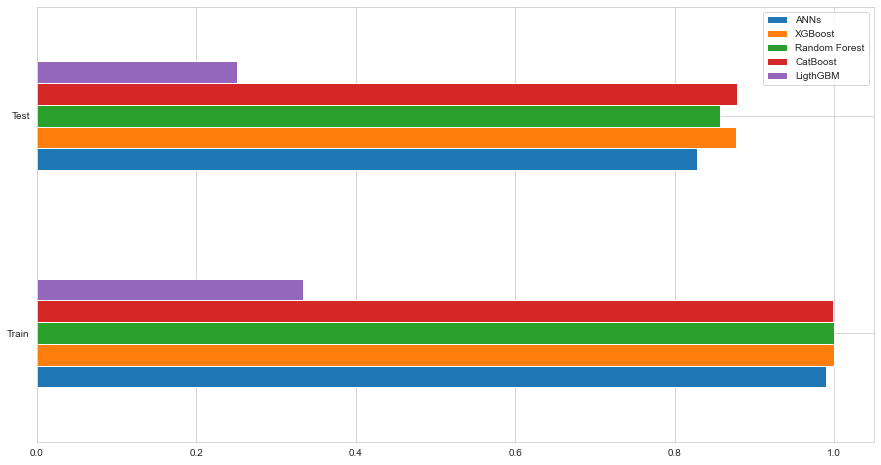

In [59]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

# Thank You